# Làm nổi, phát hiện biên (cạnh) - Edge Detection
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm để phát hiện cạnh, đường biên.
Yêu cầu thư viện: OpenCV 3.4, matplotlib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/'My Drive'/Code/ImagesProcessing

/content/drive/My Drive/Code/ImagesProcessing


In [6]:
ls

BasicProcessing.ipynb                 images/
Convolution.ipynb                     images_test/
Day7_Object_Detection_solution.ipynb  ReadImages.ipynb
Edge_detection.ipynb                  SS_Course_Day1.ipynb
Histogram.ipynb


In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

import cv2
import numpy as np
print(cv2.__version__)

4.5.5


## 1.1 Sobel Edge Detection

### Sobel sử dụng nhân chập
Dựa trên nguyên lý về dựa trên nguyên lý đạo hàm bậc nhất và bậc hai, ta có một số giải thuật làm nổi biên như:Prewit, Sobel, Laplace. Trong thực hành, chúng được thể hiện bằng bộ mẫu (kernel). Thay vì tính đạo hàm, chúng ta sử dụng nhân chập. Ví dụ bộ mẫu sau được sử dụng cho giải thuật Prewit:
Nổi biên theo phương gang

    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
Nổi biên theo phương thẳng đứng

    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]

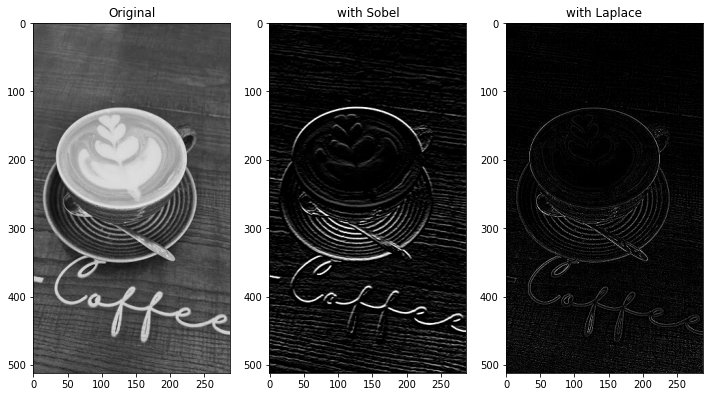

In [2]:
plt.figure(figsize=(12,12))
img = cv2.imread('images/2021-03-14_orig.jpg',cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(131)
plt.gca().set_title('Original')
plt.imshow(gray,cmap='gray',norm=NoNorm())

kernel =np.array([ #Sobel theo chiều ngang, đạo hàm bậc 1
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
sobel_x = cv2.filter2D(gray, -1, kernel) 
kernel =np.array([ #Sobel theo chiều ngang, đạo hàm bậc 1
    [-1,-1,-1],
    [ 0, 0, 0],
    [ 1, 1, 1]
])
sobel_y = cv2.filter2D(gray, -1, kernel) 
sobel=(sobel_x+sobel_y)/2
# -1 means the output image will have the same depth as the source
plt.subplot(132)
plt.gca().set_title('with Sobel')
plt.imshow(sobel_y,cmap='gray',norm=NoNorm())

kernel =np.array([ #Sobel theo chiều ngang, đạo hàm bậc 1
    [ 0,-1, 0],
    [-1, 4,-1],
    [ 0,-1, 0]
])
laplace = cv2.filter2D(gray, -1, kernel)
plt.subplot(133)
plt.gca().set_title('with Laplace')
plt.imshow(laplace,cmap='gray',norm=NoNorm())
plt.show()

#### Bài tập. Áp dụng thêm các kernel giúp nổi biên theo đường chéo theo giải thuật Sobel
Nổi biên theo phương ngang

    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
Nổi biên theo phương thẳng đứng

    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
Nổi biên theo đường chéo

    [ 0, 1,1],
    [-1, 0,1],
    [-1,-1,0]
    
    [0,-1,-1],
    [1, 0,-1],
    [1, 1, 0]    

In [3]:
### CODE HERE


### Sobel với các hàm dựng sẵn của opencv  
Thư viện OpenCV cung cấp hàm cv2.Sobel() để tính đạo hàm Sobel của ảnh.

Xem thêm các tham số của hàm: https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#sobel

Để các thuật toán phát hiện biên edge detection làm việc tốt, trước hết ta cần làm mịn ảnh để loại bớt nhiễu. Ta có thể dùng hàm cv2.GaussianBlur() để làm mịn ảnh.

Hàm cv2.Sobel() cho phép tính đạo hàm theo các hướng dọc và ngang của ảnh, để tổng hợp kết quả, ta lấy trung bình của đạo hàm theo hai hướng tại mỗi điểm ảnh.

Cuối cùng, Sobel sẽ làm nổi bật các đường biên, còn các nhiễu sẽ mờ hơn, vì vậy ta chọn ngưỡng để loại bỏ các điểm ảnh có độ sáng thấp này.

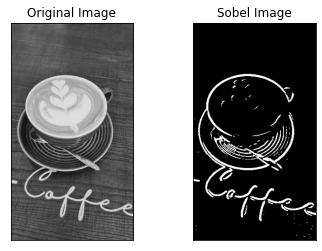

In [4]:
def basic_sobel_edge_detection(img, blur_ksize=5, sobel_ksize=1, skipping_threshold=5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)
        
    #sobel
    img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=sobel_ksize)
    img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=sobel_ksize)

    img_sobel = (img_sobelx + img_sobely)/2
    
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = 255
    return img_sobel


img=cv2.imread('images/2021-03-14_orig.jpg')
img_sobel = basic_sobel_edge_detection(img, 7, 1, 10)
plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
plt.show()

##### Cải tiến hàm basic_sobel_edge_detection

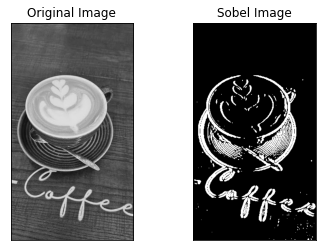

In [5]:
def sobel_edge_detection(image_path, blur_ksize=5, sobel_ksize=1, skipping_threshold=10):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)

    sobelx64f = cv2.Sobel(img_gaussian,cv2.CV_64F,1,0,ksize=sobel_ksize)
    abs_sobel64f = np.absolute(sobelx64f)
    img_sobelx = np.uint8(abs_sobel64f)

    sobely64f = cv2.Sobel(img_gaussian,cv2.CV_64F,1,0,ksize=sobel_ksize)
    abs_sobel64f = np.absolute(sobely64f)
    img_sobely = np.uint8(abs_sobel64f)

    img_sobel = (img_sobelx + img_sobely)/2
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = 255
    return img_sobel

image_path = 'images/2021-03-14_orig.jpg'
gray = cv2.imread(image_path, 0)
img_sobel = sobel_edge_detection(image_path, 7, 1, 10)

plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 1.2 Prewitt Edge Detection
Để tính đạo hàm theo toán tử Prewitt, ta có thể dùng hàm cv2.filter2D() và truyền tham số kernel theo Prewitt.

Tương tự như với toán tử Sobel, ta sẽ tính 2 trường hợp cạnh black-to-white và white-to-black rồi tính trung bình cộng 2 kết quả.

Cuối cùng đặt ngưỡng loại bỏ nhiễu.

In [6]:
def prewitt_edge_detection(image_path, blur_ksize = 5, skipping_threshold=30):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)

    #prewitt
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    img_prewitt1 = (img_prewittx + img_prewitty)/2
    
    kernelx2 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    kernely2 = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    img_prewittx2 = cv2.filter2D(img_gaussian, -1, kernelx2)
    img_prewitty2 = cv2.filter2D(img_gaussian, -1, kernely2)
    img_prewitt2 = (img_prewittx2 + img_prewitty2)/2
    
    img_prewitt = (img_prewitt1 + img_prewitt2)/2
    for i in range(img_prewitt.shape[0]):
        for j in range(img_prewitt.shape[1]):
            if img_prewitt[i][j] < skipping_threshold:
                img_prewitt[i][j] = 0
            else:
                img_prewitt[i][j] = 255
    return img_prewitt

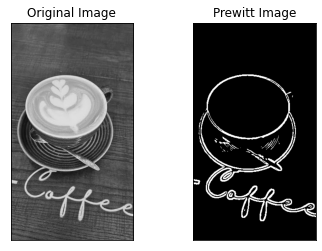

In [7]:
image_path = 'images/2021-03-14_orig.jpg'
gray = cv2.imread(image_path, 0) 
img_prewitt = prewitt_edge_detection(image_path, 9, 30)

plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_prewitt,cmap = 'gray')
plt.title('Prewitt Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 1.3. Canny Edge Detection
Thư viện OpenCV cung cấp hàm cv2.Canny() để phát hiện biên bằng thuật toán Canny.

https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#cv2.Canny

Tương tự như các phương pháp phát hiện biên ở trên, trước hết ta cũng dùng cv2.GaussianBlur() để làm mịn ảnh rồi chọn ngưỡng để loại bỏ nhiễu.

In [8]:
def canny_edge_detection(image_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=30):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)
    img_canny = cv2.Canny(img_gaussian,threshold1,threshold2)
#     for i in range(img_canny.shape[0]):
#         for j in range(img_canny.shape[1]):
#             if img_canny[i][j] < skipping_threshold:
#                 img_canny[i][j] = 0
    return img_canny

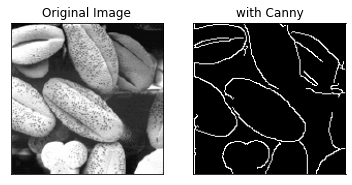

In [9]:
image_path = 'images/D24_04.jpg'
gray = cv2.imread(image_path, 0)
img_canny = canny_edge_detection(image_path, 5, 50, 200, 1)
Image('images/D24_04.jpg')
cv2.imwrite('images/D24_04_canny.jpg', img_canny)
Image('images/D24_04_canny.jpg')
plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_canny,cmap = 'gray')
plt.title('with Canny'), plt.xticks([]), plt.yticks([])
plt.show()

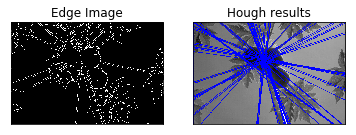

In [22]:
import numpy as np
img = cv2.imread('images/Tree.jpg')
img_vis = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,200,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/90,100)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img_vis,(x1,y1),(x2,y2),(0,0,255),2)

plt.subplot(121),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_vis,cmap = 'gray')
plt.title('Hough results'), plt.xticks([]), plt.yticks([])
plt.show()

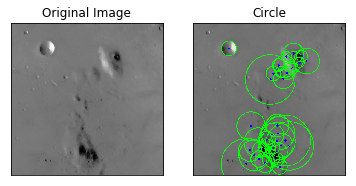

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('images/Moon_01.jpg',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
# edges = cv2.Canny(img,100,200,apertureSize = 3)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=20,minRadius=10,maxRadius=100)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(cimg)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg,cmap = 'gray')
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.show()